In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import main, clean

In [2]:
import locale
locale.setlocale(locale.LC_ALL, '')
format_spec = '{:n}'
format_dict = { 'sum': format_spec, 'min': format_spec, 'max': format_spec, 
                'mean': format_spec, 'std': format_spec, 
                'duración': format_spec, 'divisiones': format_spec, 'conteo': format_spec, 'intervalo': format_spec}

### Leer y limpiar datos originales

In [3]:
# Leer datos originales y pasarlos a un dataframe
d = clean.convert('xrays_visits.csv', ',', False)
# Traducir nombres de las columnas
d_t = clean.column_translator(d[0], 'es', clean.COLUMN_NAMES, False)
# Convertir campos de hora a minutos
d_t[clean.COLUMN_NAMES['duration']['es']] = d_t[clean.COLUMN_NAMES['duration']['es']].div(60)
# Añadir columnas con fecha procesada
df1 = clean.getdatetimes(d_t, clean.COLUMN_NAMES['entry_date']['es'], clean.COLUMN_NAMES['exit_date']['es'], [999], False)

### Procesar y analizar la serie de datos con las duraciones de las estadías de los pacientes

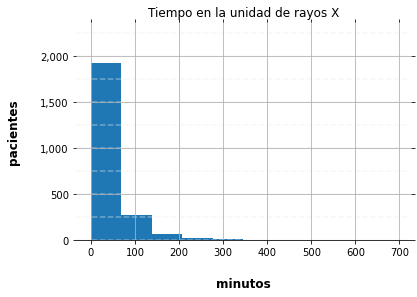

In [4]:
# Obtener serie de datos con las duraciones de las estadías de los pacientes, trazar histograma
durations_tup = main.timedeltas_hist_bylength(df1[1], df1[0], 'es', main.MESSAGES, clean.COLUMN_NAMES, False)
durations, durations_df = durations_tup[0], durations_tup[1]

In [5]:
# Conteo de observaciones por cada uno de los rangos del histograma
durations.style.format(format_spec)

,divisiones,conteo
0,"69,1",1.919
1,"138,2",271
2,"207,3",62
3,"276,4",21
4,"345,5",7
5,"414,6",1
6,"483,7",1
7,"552,8",1
8,"621,9",2
9,691,1


In [6]:
# Caracterización estadística básica de las duraciones
durations_df.describe().style.format(format_dict)

,duración
count,2.286
mean,"39,1439"
std,"50,3152"
min,0
25%,11
50%,23
75%,50
max,691


### Analizar patrones según día de la semana, hora, edad y sexo de los pacientes

In [21]:
# Obtener dataframe con las llegadas de los pacientes por día de la semana, hora, edad y sexo.
COLUMNS_4 = [clean.COLUMN_NAMES['weekday']['es'],
             clean.COLUMN_NAMES['hour']['es'],
             clean.COLUMN_NAMES['age']['es'],
             clean.COLUMN_NAMES['gender']['es'],
             ]
total_dfs = main.timedeltas_bars_times_total(d_t, COLUMNS_4, [999], 'es', main.MESSAGES, clean.COLUMN_NAMES, False, False)
t_weekday, t_hour = total_dfs[0][0], total_dfs[0][1]
c_weekday, c_hour = total_dfs[1][1], total_dfs[1][0]

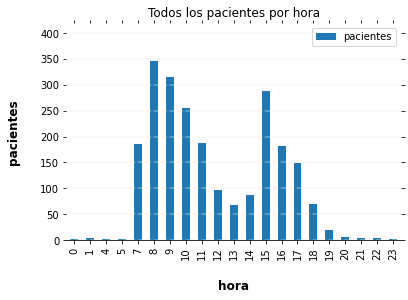

In [22]:
# Gráfico de barras con las llegadas de pacientes por día de la semana
df__, title, x_axisname, y_axisname = c_weekday[0], c_weekday[1], c_weekday[2], c_weekday[3] 
ax1 = clean.build_count_barchart(df__, title, x_axisname, y_axisname, None, False)
clean.customizechart(ax1, title, x_axisname, y_axisname)

In [23]:
# Caracterización estadística básica de las llegadas de pacientes por día de la semana
t_weekday.style.format(format_dict)

,sum,min,mean,max,std,count
dia_semana,,,,,,
1,27.918,0,"40,0545",432,"46,3868",697
2,17.323,0,"36,2406",323,"40,724",478
3,8.983,0,"41,2064",691,"64,84",218
4,14.523,0,"43,8761",586,"52,8958",331
5,633,0,"42,2",177,"45,192",15
6,5,5,5,5,nan,1
7,19.405,0,"36,7519",591,"54,8557",528


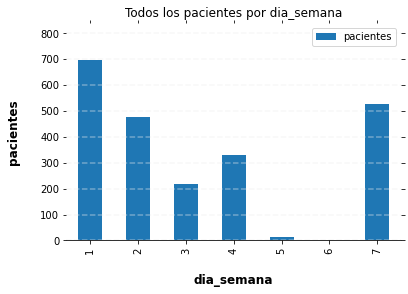

In [24]:
# Gráfico de barras con las llegadas de pacientes por hora
df__, title, x_axisname, y_axisname = c_hour[0], c_hour[1], c_hour[2], c_hour[3] 
ax1 = clean.build_count_barchart(df__, title, x_axisname, y_axisname, None, False)
clean.customizechart(ax1, title, x_axisname, y_axisname)

In [11]:
# Caracterización estadística básica de las llegadas de pacientes por hora del día
t_hour.style.format(format_dict)

,sum,min,mean,max,std,count
hora,,,,,,
0,1.199,508,"599,5",691,"129,401",2
1,860,0,"286,667",586,"293,205",3
4,344,0,172,344,"243,245",2
5,432,0,216,432,"305,47",2
7,7.294,4,"39,2151",300,"54,0998",186
8,15.908,0,"46,1101",277,"51,9345",345
9,11.692,0,"37,1175",232,"41,7822",315
10,9.281,0,"36,3961",258,"38,368",255
11,5.447,0,"29,1283",203,"33,9268",187


### Analizar diferencias entre las llegadas

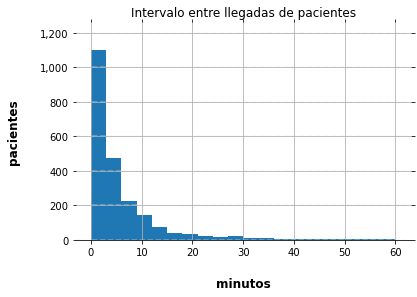

In [12]:
diffs_tup = main.entry_diffs(d_t, [999], 'es', main.MESSAGES, clean.COLUMN_NAMES, False)
diffs, diffs_df = diffs_tup[0], diffs_tup[1]

In [13]:
# Mostrar las categorías del histograma
diffs.style.format(format_dict)
diffs.append(diffs.sum(numeric_only=True).rename('Total')).style.format(format_dict)

,divisiones,conteo
0,3,1.098
1,6,474
2,9,225
3,12,143
4,15,74
5,18,38
6,21,32
7,24,24
8,27,19
9,30,21


In [14]:
diffs_df.describe().style.format(format_dict)

,intervalo
count,2.199
mean,"5,20236"
std,"7,83981"
min,0
25%,1
50%,3
75%,6
max,60


### Gráficas de cantidad de pacientes según departamento

In [15]:
# Generar los dataframes por departamento
COLUMNS_2 = ['dia_semana', 'hora']
COLUMN_CRITERIA = 'departmento'
COLUMN_CRITERIA_CATEGORIES = clean.read_txt('departments.txt', False)

dept_dfs = main.timedeltas_bars_times_by_criteria( d_t, COLUMNS_2,[999], COLUMN_CRITERIA, COLUMN_CRITERIA_CATEGORIES,
                                                    'es', main.MESSAGES, clean.COLUMN_NAMES, False, False)


In [16]:
# Función para mostrar un departamento a la vez
def show_department(i):
    """
    i: índice de la información empaquetada en la lista de dataframes de los departamentos
    Mostrará un histograma e información estadística
    """
    print(dept_dfs[i][1])
    dept_dfs[i][2]

    d_sub, title, x_axisname, y_axisname, categories = dept_dfs[i][3][0], dept_dfs[i][3][1], dept_dfs[i][3][2], dept_dfs[i][3][3], dept_dfs[i][3][4]

    ax1 = clean.build_count_barchart(d_sub, title, x_axisname, y_axisname, categories, False)
    clean.customizechart(ax1, title, x_axisname, y_axisname)

    return d_sub
    

{19: 'Institute of Hematology and Bone Marrow Transplant'}


,sum,min,mean,max,std
dia_semana,,,,,
1,174,3,"21,75",94,"32,5785"
2,187,4,"62,3333",99,"51,0718"
3,51,6,"12,75",25,"8,73212"
4,17,17,17,17,nan
7,244,4,"22,1818",76,"20,9324"


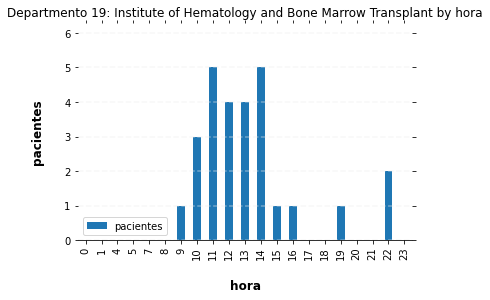

In [17]:
show_department(80).groupby('dia_semana')['duración'].agg(['sum', 'min', 'mean', 'max', 'std']).style.format(format_dict)


{134: 'Ultrasound Unit'}


,sum,min,mean,max,std
dia_semana,,,,,
1,4.436,0,"43,9208",113,"30,1369"
2,2.297,0,"25,5222",78,"19,9917"
3,397,2,"39,7",87,"28,3982"
4,186,0,"7,44",41,"9,94602"
5,177,177,177,177,nan
7,594,0,"22,8462",53,"15,3198"


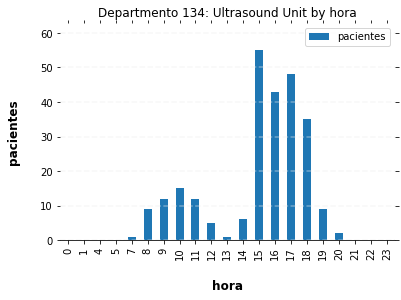

In [18]:
show_department(121).groupby('dia_semana')['duración'].agg(['sum', 'min', 'mean', 'max', 'std']).style.format(format_dict)

{71: 'Department of Neurosurgery'}


,sum,min,mean,max,std
dia_semana,,,,,
7,1,1,1,1,nan


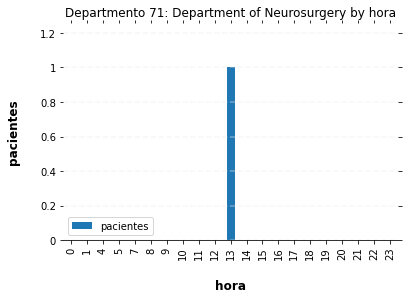

In [19]:
show_department(103).groupby('dia_semana')['duración'].agg(['sum', 'min', 'mean', 'max', 'std']).style.format(format_dict)